# Use SGD to replace analytical solutions in Project 1

In [1]:
# Import functions
import SGDLinReg as sgd
import numpy as np

# plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Misc.
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

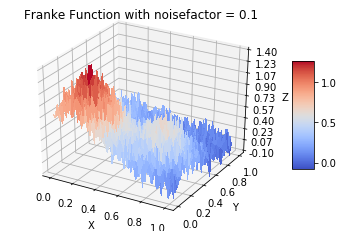

In [2]:
# Make data.
N = 70
noisefactor = 0.1
x,y,z = sgd.init_data(N,noisefactor)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim((-0.10, 1.40))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Franke Function with noisefactor = {}".format(noisefactor))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [3]:
# Initializing the data
N = 100
noisefactor = 0.1
n = 5
test_size=0.2

# Set run parameters
alpha = 0.001
b_size = 32
stop = 0.5
max_ep = 400

# Intializing the dataset
x, y, z = sgd.init_data(N,noisefactor)

# Creating the design matrix
X = sgd.create_X(x, y, n)

# Splitting into testing and training
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel(), test_size=test_size)

#Scaling the data
X_train, X_test = sgd.Scaling(X_train, X_test)


#### PERFORM SGD #####
beta_opt, cost_list_train, mse_list_train, mse_list_test = sgd.SGD(X_train, z_train, X_test, z_test, learn_rate=alpha,\
                                                                   batch_size=b_size, stop_at=stop, max_epochs=max_ep, method="OLS")


Max epochs reached!


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


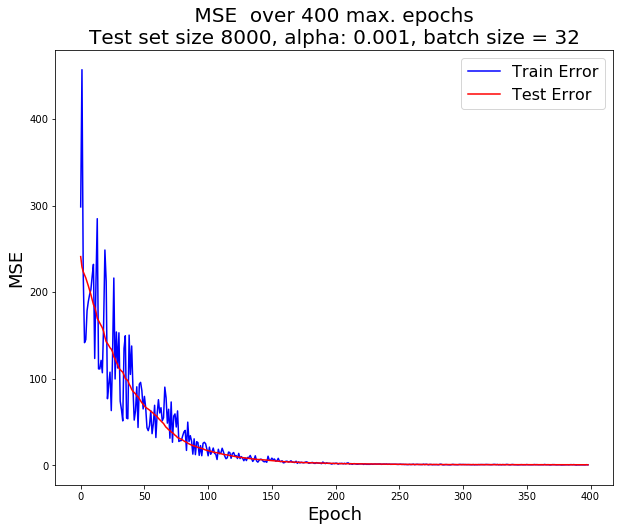

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(len(mse_list_train)),mse_list_train,'b' ,label='Train Error')
ax.plot(np.arange(len(mse_list_test)),mse_list_test,'r' ,label='Test Error')
#ax.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('MSE',fontsize=18)
ax.set_title(" MSE  over {0} max. epochs \nTest set size {1}, alpha: {2}, batch size = {3}".format(max_ep, len(X_train), alpha, b_size), fontsize=20)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

ax.legend(fontsize=16)
#fig.savefig('Results/SGD_init.png')
fig.show()

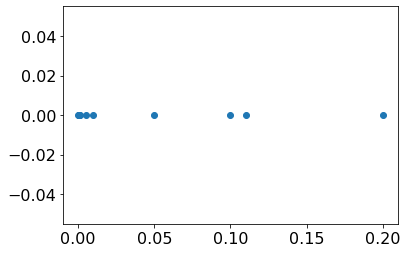

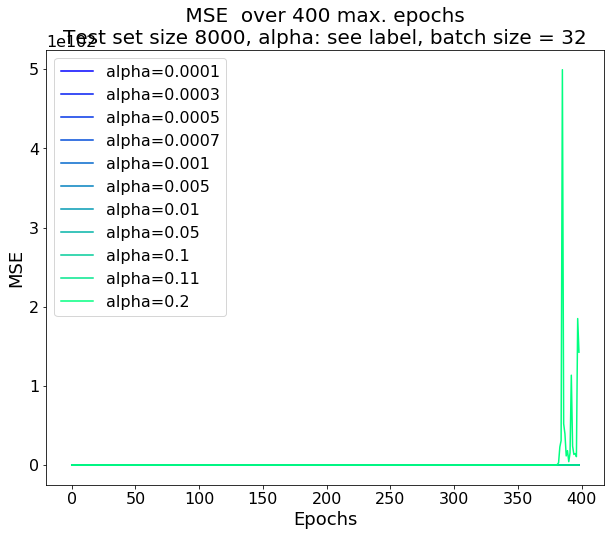

In [6]:
# as function of the chosen learning rates, the number of mini-batches and epochs as well as algorithm for scaling the learning rate

### As function of learning rate ###

#lrnrate_vector = np.array([0.0001, 0.0003,0.0005,0.0007,0.001, 0.005, 0.01, 0.05, 0.1])
lrnrate_vector = np.array([0.0001, 0.0003,0.0005,0.0007,0.001, 0.005, 0.01, 0.05, 0.1, 0.11, 0.2]) # Too large

plt.plot(lrnrate_vector, np.zeros((lrnrate_vector.shape)),'o')

mse_list = []

#### PERFORM SGD DEPENDENT ON BATCH SIZE #####
for i in range(len(lrnrate_vector)):
    beta_opt, cost_list_train, mse_list_train, mse_list_test = sgd.SGD(X_train, z_train, X_test, z_test, learn_rate=lrnrate_vector[i],\
                                                                       batch_size=b_size, stop_at=stop, max_epochs=max_ep, method="OLS", verbose=False)
    mse_list.append(mse_list_train)


# PLOT RESULTS #
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Epochs', fontsize=18)
ax.set_ylabel('MSE',fontsize=18)
ax.set_title(" MSE  over {0} max. epochs \nTest set size {1}, alpha: see label, batch size = {3}".format(max_ep, len(X_train), alpha, b_size), fontsize=20)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# Colors
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0, 1.0, len(mse_list)))
#colors = hsv(np.linspace(0, 1.0, len(kinds)))

for i in range(len(mse_list)):
    ax.plot(np.arange(len(mse_list[i])),mse_list[i],color=colors[i],label="alpha="+str(lrnrate_vector[i]))

    
ax.legend(fontsize=16)
#fig.savefig('Results/GradDesc_LearnRateTooLarge.png')
fig.show()


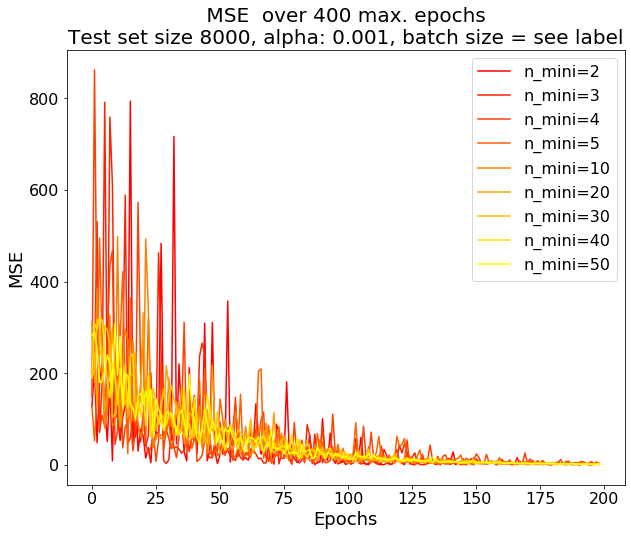

In [8]:
### As function of mini batches ###
n_minib = np.arange(start=2,stop=6,step=1)
#n_minib = np.array([5,10,16,20,25])
n_minib = np.append(n_minib,np.arange(start=10,stop=51,step=10))

mse_list = []

#### PERFORM SGD DEPENDENT ON BATCH SIZE #####
for i in range(len(n_minib)):
        
    beta_opt, cost_list_train, mse_list_train, mse_list_test = sgd.SGD(X_train, z_train, X_test, z_test, learn_rate=alpha,\
                                                                       batch_size=n_minib[i], stop_at=stop, max_epochs=200, method="OLS",verbose=False)
    mse_list.append(mse_list_train)


# PLOT RESULTS #
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Epochs', fontsize=18)
ax.set_ylabel('MSE',fontsize=18)
ax.set_title(" MSE  over {0} max. epochs \nTest set size {1}, alpha: {2}, batch size = see label".format(max_ep, len(X_train), alpha, b_size), fontsize=20)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# Colors
cmap = plt.get_cmap('autumn')
colors = cmap(np.linspace(0, 1.0, len(mse_list)))

for i in range(len(mse_list)):
    ax.plot(np.arange(len(mse_list[i])),mse_list[i],color=colors[i],label="n_mini="+str(n_minib[i]))

ax.legend(fontsize=16)
#fig.savefig('Results/GradDesc_BatchSize.png')
fig.show()

## Ridge regression

In [9]:
# Set run parameters
alpha = 0.001
b_size = 32
stop = 0.5
max_ep = 400
lam = 0.001


#### PERFORM SGD #####
beta_opt, cost_list_train, mse_list_train, mse_list_test = sgd.SGD(X_train, z_train, X_test, z_test, learn_rate=alpha,\
                                                                   batch_size=b_size, stop_at=stop, max_epochs=max_ep,\
                                                                  method="ridge",lmbda=lam)


Max epochs reached!


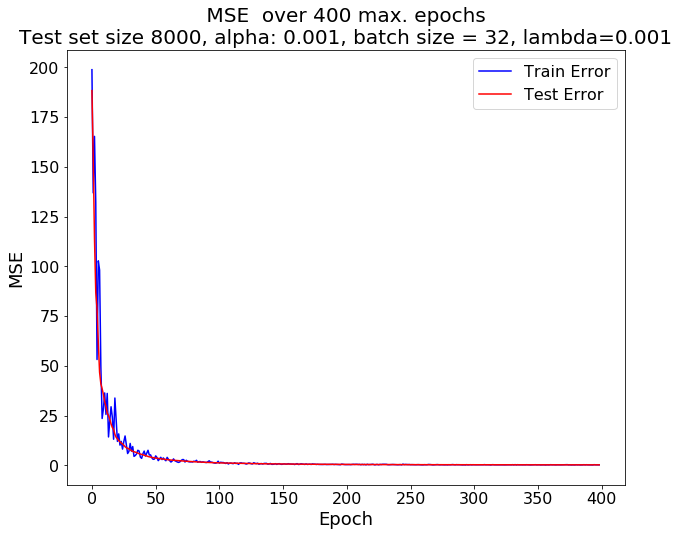

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.arange(len(mse_list_train)),mse_list_train,'b' ,label='Train Error')
ax.plot(np.arange(len(mse_list_test)),mse_list_test,'r' ,label='Test Error')
#ax.plot(np.arange(n)[startpoint:endpoint],TestError[startpoint:endpoint],'r' ,label='Test Error')
ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('MSE',fontsize=18)
ax.set_title(" MSE  over {0} max. epochs \nTest set size {1}, alpha: {2}, batch size = {3}, lambda={4}".format(max_ep, len(X_train), alpha, b_size,lam), fontsize=20)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)


ax.legend(fontsize=16)
#fig.savefig('Results/GradDesc_Ridge.png')
fig.show()

In [11]:
## Loop through lambdas and create grid plot, study how fast converges
stop = 100
max_ep = 500

### As function of mini batches ###
lmb =  np.array([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0])
alph = np.array([0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.005, 0.01, 0.05, 0.1])

# Initalize matrix to store number of epochs until converging to "stop"
converge_mat = np.zeros(shape=(len(alph),len(lmb)))

#### PERFORM SGD DEPENDENT ON BATCH SIZE #####
for i in range(len(lmb)):
    for j in range(len(alph)):

        #### PERFORM SGD #####
        beta_opt, cost_list_train, mse_list_train, mse_list_test =\
        sgd.SGD(X_train, z_train, X_test, z_test, learn_rate=alph[j],\
                batch_size=b_size, stop_at=stop, max_epochs=max_ep,\
                method="ridge",lmbda=lmb[i],verbose=False)

        converge_mat[i,j] = len(mse_list_train)


[Text(1, 0.0, '0'),
 Text(1, 100.0, '100'),
 Text(1, 200.0, '200'),
 Text(1, 300.0, '300'),
 Text(1, 400.0, '400')]

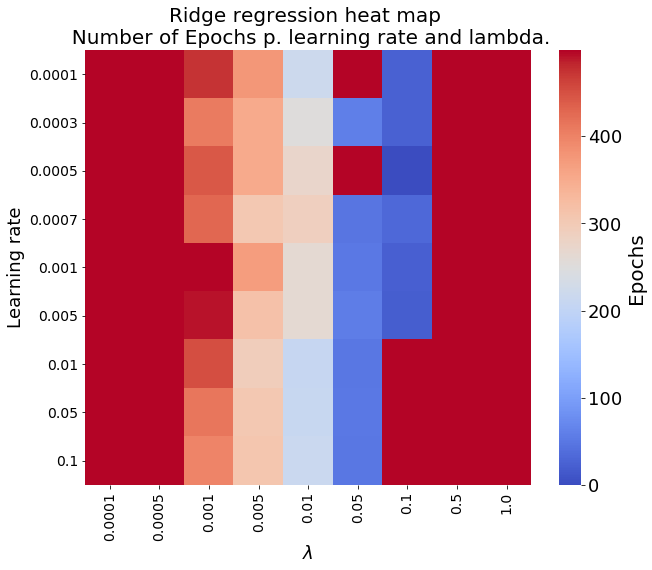

In [12]:
# Plot results as heatmap
plt.figure(figsize=(10,8))

ax = sns.heatmap(converge_mat, xticklabels=lmb, yticklabels=alph, cmap="coolwarm")#, cbar_kws={'label': 'Epochs'})
ax.set_title('Ridge regression heat map \n  Number of Epochs p. learning rate and lambda. ',fontsize = 20)
ax.set_ylabel('Learning rate',fontsize = 18)
ax.set_xlabel('$\lambda$',fontsize = 18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)
ax.figure.axes[-1].set_ylabel('Epochs', size=20)
ax.figure.axes[-1].set_yticklabels(ax.figure.axes[-1].get_ymajorticklabels(), size=18)

#plt.savefig('Results/SGD_RidgeHeatMap.png')